In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from collections import defaultdict
from tensorflow.keras.optimizers import Adam
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score as acs, classification_report, precision_recall_fscore_support as score
import wordcloud
from wordcloud import WordCloud
import plotly.express as px
from collections import Counter

%matplotlib inline

from nltk.tokenize import word_tokenize
nltk.download('punkt')
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
import re
import string
from os import path
from PIL import Image



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
tdf, fdf = pd.read_csv("/content/drive/MyDrive/MachineLearning/Project/True.csv"),pd.read_csv("/content/drive/MyDrive/MachineLearning/Project/Fake.csv")


In [6]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [7]:
tdf

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [8]:
fdf

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [8]:
tdf['combo'] = tdf['title'] + ' ' + tdf['text']
tdf['label'] = '1'
fdf['combo'] = fdf['title'] + ' ' + fdf['text']
fdf['label'] = '0'

In [10]:
tdf

,title,text,subject,date,combo,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...,1
...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",'Fully committed' NATO backs new U.S. approach...,1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",LexisNexis withdrew two products from Chinese ...,1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",Minsk cultural hub becomes haven from authorit...,1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",Vatican upbeat on possibility of Pope Francis ...,1


In [9]:
dataset = pd.concat([tdf,fdf])

In [10]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = stopwords.words('english')

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    #text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [11]:
dataset['nc_combo'] = dataset ['combo']
dataset['combo'] = dataset['combo'].apply(clean_text)
dataset['combo'] = dataset['combo'].str.replace('\d+', '')
dataset.head()

<ipython-input-11-43c51e0744d4>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['combo'] = dataset['combo'].str.replace('\d+', '')


,title,text,subject,date,combo,label,nc_combo
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",us budget fight looms republicans flip fiscal ...,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",us military accept transgender recruits monday...,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",senior us republican senator let mr mueller jo...,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",fbi russia probe helped australian diplomat ti...,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",trump wants postal service charge much amazon ...,1,Trump wants Postal Service to charge 'much mor...


In [12]:
tdf['combo'] = tdf['combo'].apply(clean_text)
tdf['combo'] = tdf['combo'].str.replace('\d+', '')
fdf['combo'] = fdf['combo'].apply(clean_text)
fdf['combo'] = fdf['combo'].str.replace('\d+','')
tdf.head()
fdf.head()

<ipython-input-12-f92eda16874d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tdf['combo'] = tdf['combo'].str.replace('\d+', '')
<ipython-input-12-f92eda16874d>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  fdf['combo'] = fdf['combo'].str.replace('\d+','')


,title,text,subject,date,combo,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",donald trump sends embarrassing new years eve ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",drunk bragging trump staffer started russian c...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",sheriff david clarke becomes internet joke thr...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",trump obsessed even obamas name coded website ...,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",pope francis called donald trump christmas spe...,0


In [13]:
dataset.head(-5)


,title,text,subject,date,combo,label,nc_combo
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",us budget fight looms republicans flip fiscal ...,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",us military accept transgender recruits monday...,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",senior us republican senator let mr mueller jo...,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",fbi russia probe helped australian diplomat ti...,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",trump wants postal service charge much amazon ...,1,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...,...,...,...
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",seven iranians freed prisoner swap returned ir...,0,Seven Iranians freed in the prisoner swap have...
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",#hashtag hell fake left dady chery gilbert mer...,0,#Hashtag Hell & The Fake Left By Dady Chery a...
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",astroturfing journalist reveals brainwashing t...,0,Astroturfing: Journalist Reveals Brainwashing ...
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",new american century era fraud paul craig robe...,0,The New American Century: An Era of Fraud Paul...


In [14]:
vocab = defaultdict(lambda: 0)
texts = dataset['combo']
for text in texts:
  for token in text.split():
    vocab[token] += 1

term_frequencies = [(x,y) for y,x in vocab.items()]


In [15]:
term_frequencies = sorted(term_frequencies, reverse = True)

In [16]:
frequencies = [x for x,y in term_frequencies]
k = max(frequencies)

In [17]:
valid_frequencies = [(x,y) for x,y in term_frequencies if x > 5]
valid_frequencies = valid_frequencies[5000:]


In [ ]:
# len(valid_frequencies)

41395

Classic ML pipline(Without Embeddings)

In [18]:
valid_vocab = set([x for y,x in valid_frequencies])
print(valid_vocab)
def get_valid_text(x):
  tmp, valid_tokens = x.split(),  []
  for token in tmp:
    if token in valid_vocab:
      valid_tokens.append(token)
  return " ".join(valid_tokens)

{'sequence', 'roughed', 'intercourse', 'spacecraft', 'danylyuk', 'sinema', 'befitting', 'diluted', 'cramdown', 'abramovic', 'numan', 'schumers', 'rhonda', 'formalized', 'millionsmarch', 'lorenzana', 'strides', 'heldman', 'lauding', 'surpluses', 'safehaven', 'africom', 'cozy', 'predict', 'waller', 'condescending', 'spurious', 'earley', 'shortage', 'visionbo', 'prowestern', 'paperback', 'canyon', 'stepbystep', 'comprising', 'trilateral', 'climatechange', 'recep', 'breathtaking', 'yeo', 'burk', 'dnv', 'systematic', 'toughen', 'raucous', 'pascrell', 'neckdeep', 'sally', 'underlined', 'livesthe', 'pancasila', 'finite', 'perceptions', 'shack', 'planks', 'hoang', 'compromising', 'cheerful', 'prodding', 'nowread', 'statom', 'deadbeat', 'unmistakable', 'cringes', 'reintroduced', 'conant', 'ericksen', 'tighten', 'peddling', 'alternet', 'bowing', 'selfimposed', 'neofeudal', 'timespicayune', 'costing', 'fiveweek', 'tolerant', 'squashed', 'anguished', 'tunisia', 'lighthouselloyd', 'massieu', 'added

In [19]:
def count_tokens(data):
  tmp, count = list(data['combo']), 0 
  for text in tmp:
    count += len(text.split(" "))
  print(count)
count_tokens(dataset)

10953769


In [20]:
dataset['combo'].apply(get_valid_text)

0        looms flip faction restraint pivot meadows bra...
1        recruits enlist recruits litigate interim occu...
2        cbss interfered loomed receding prepares inten...
3        tipoff nyt papadopoulos dirt papadopoulos fbis...
4        postal shipments postal packages amzno retail ...
                               ...                        
23476    sailors mishap vessels straying mere coinciden...
23477    yahoo settles classaction m tribes ars yahoo a...
23478    sunnistan territorial booty reliable nonjihadi...
23479    jazeera quits jazeera failures plotting jazeer...
23480    sailors neocon stunt riverine farsi persian st...
Name: combo, Length: 44898, dtype: object

In [21]:
combos, valid_vocab = [], set([x for y,x in valid_frequencies])
for text in list(dataset['combo']):
  tmp, valids = text.split(), []
  for token in tmp:
    if token in valid_vocab:
      valids.append(token)
  combos.append((" ").join(tmp))


Word Cloud

(-0.5, 1299.5, 949.5, -0.5)

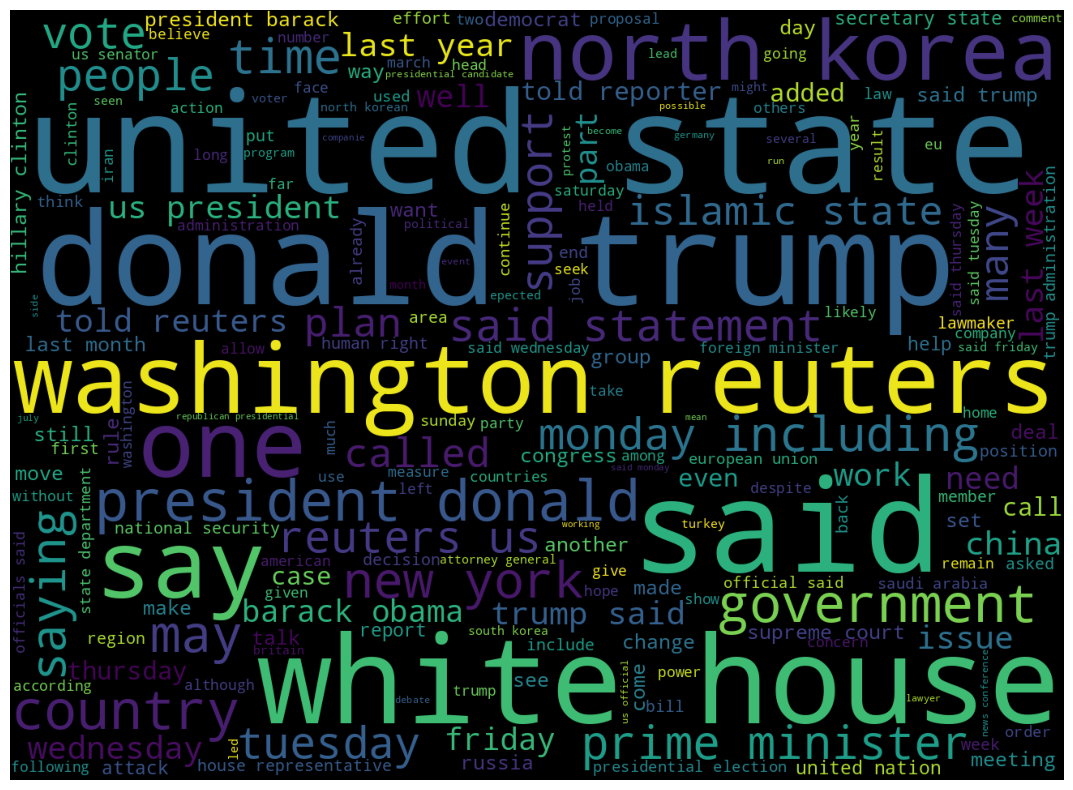

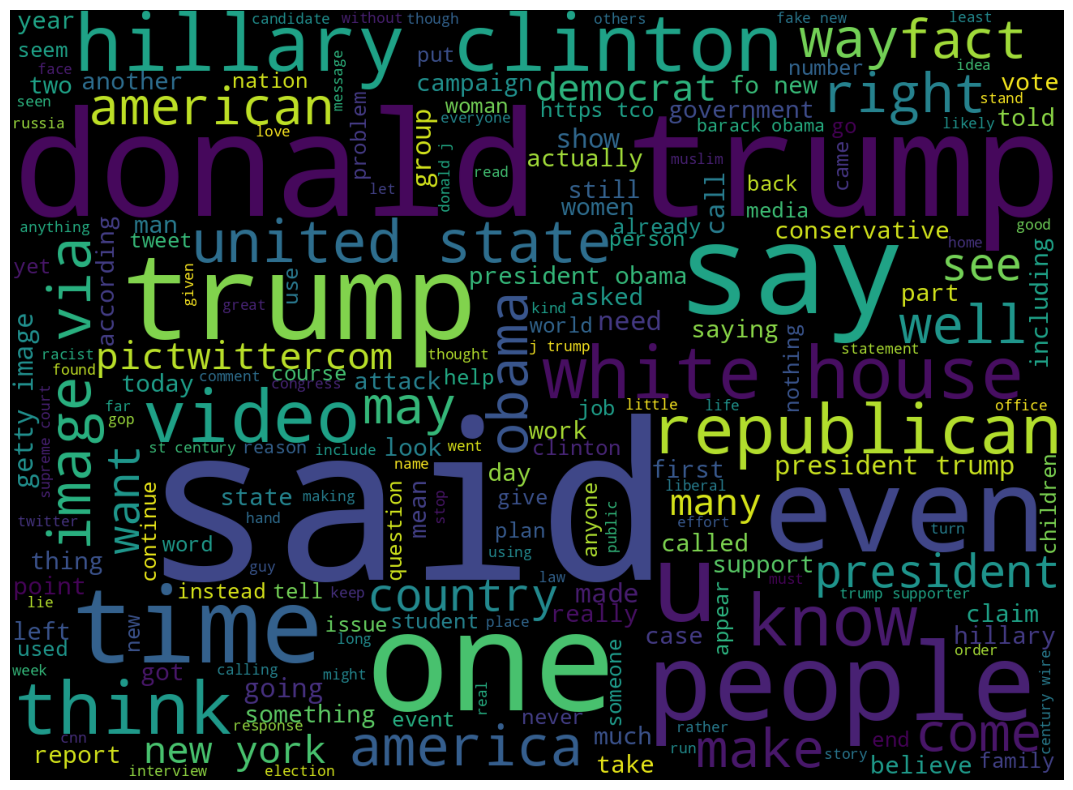

In [22]:
cloud = WordCloud(width=1300, height=950).generate(" ".join(tdf['combo'].astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
cloud = WordCloud(width=1300, height=950).generate(" ".join(fdf['combo'].astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

Common words

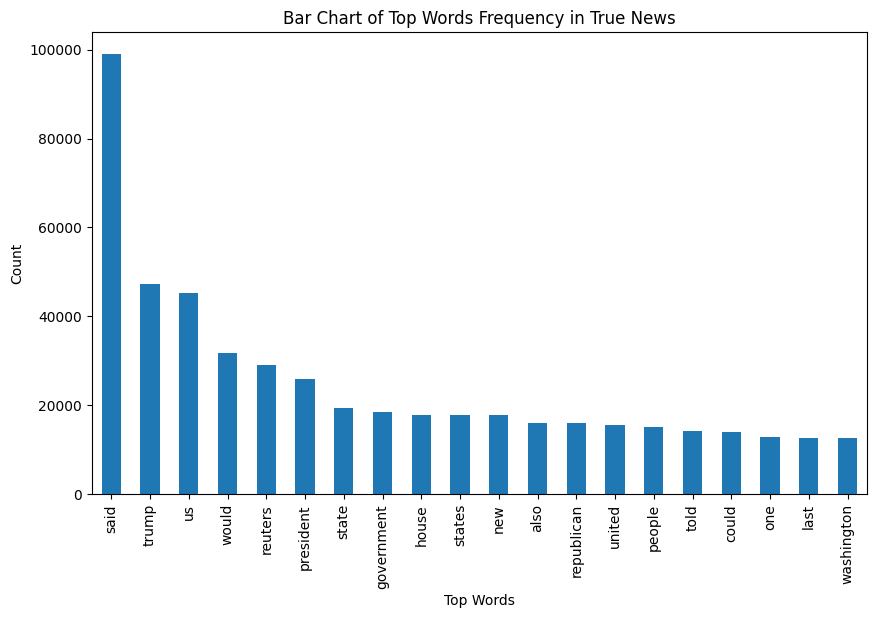

In [23]:
import collections

# my_series = pd.Series(combos, name='combos')
# combos_df = my_series.to_frame()
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(tdf['combo'], 20)

df1 = pd.DataFrame(common_words, columns=['Review', 'count'])
  
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency in True News"
)

fig = px.treemap(df1, path=['Review'], values='count',title='Common words in True News')
fig.show()

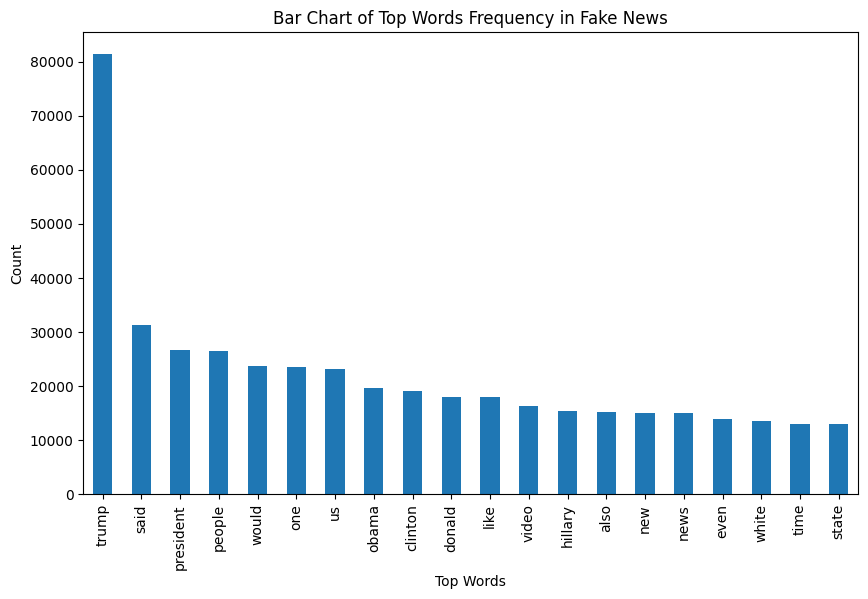

In [24]:

common_words_2 = get_top_n_words(fdf['combo'], 20)

df_2 = pd.DataFrame(common_words_2, columns=['Review', 'count'])
  
df_2.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency in Fake News"
)

fig = px.treemap(df_2, path=['Review'], values='count',title='Common words in Fake News')
fig.show()

Average word Length in the News

<ipython-input-25-e1a26aff472e>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




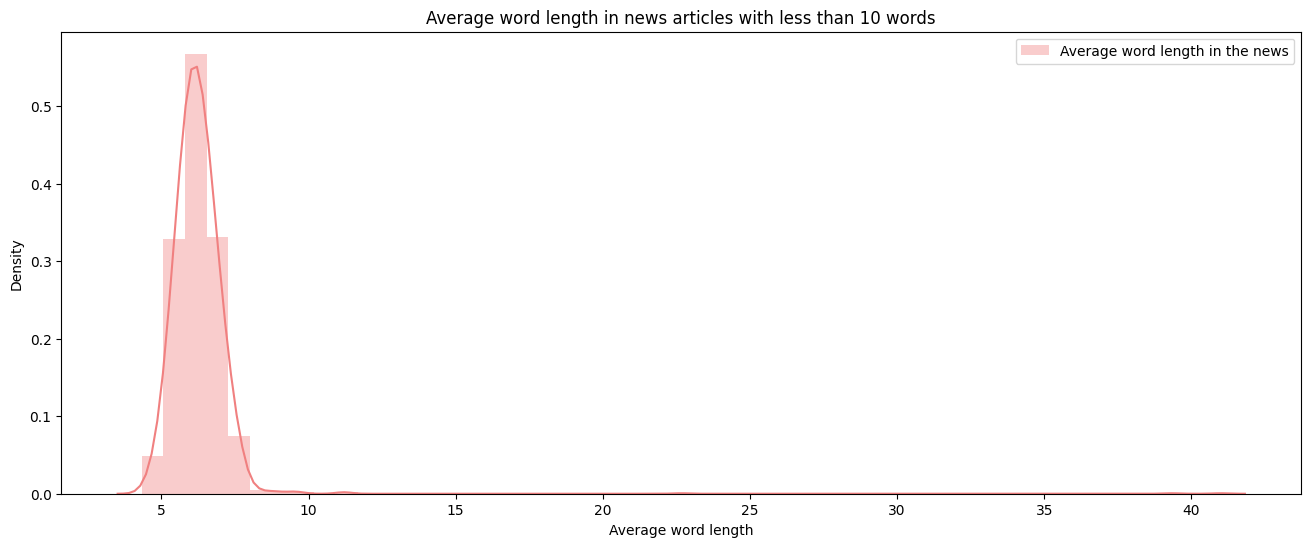

154      [7, 6, 4, 2, 4, 10, 10, 7, 10, 7, 4, 6, 9, 9, ...
271      [7, 4, 6, 6, 5, 10, 7, 11, 5, 7, 2, 10, 3, 5, ...
273      [5, 5, 4, 7, 7, 6, 8, 9, 2, 4, 7, 5, 5, 4, 8, ...
276      [10, 7, 7, 6, 3, 6, 7, 10, 7, 2, 10, 7, 2, 7, ...
278      [7, 4, 12, 10, 11, 10, 7, 2, 10, 7, 2, 7, 6, 7...
                               ...                        
23265    [6, 5, 6, 6, 2, 7, 4, 4, 6, 5, 6, 6, 10, 11, 1...
23342    [6, 7, 7, 2, 7, 4, 4, 10, 11, 9, 7, 9, 5, 4, 6...
23356    [5, 4, 5, 7, 6, 2, 7, 4, 4, 5, 3, 7, 5, 7, 6, ...
23389    [5, 4, 7, 6, 6, 4, 2, 7, 4, 4, 6, 5, 4, 6, 2, ...
23442    [5, 4, 6, 5, 4, 4, 4, 2, 7, 4, 4, 5, 6, 8, 9, ...
Name: combo, Length: 2254, dtype: object


In [25]:
# plt.figure(figsize=(16, 6))
# word=combos_df['combos'].str.split().apply(lambda x : [len(i) for i in x])
# sns.distplot(word.map(lambda x: np.mean(x)), color='lightcoral', label='Average word length in the news')

less_than_10_words_df = dataset[dataset['combo'].str.split().apply(len) < 40]
plt.figure(figsize=(16, 6))
word = less_than_10_words_df['combo'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), color='lightcoral', label='Average word length in the news')
plt.title('Average word length in news articles with less than 10 words')
plt.xlabel('Average word length')
plt.ylabel('Density')
plt.legend()
plt.show()

print(word)

Analysis

<Axes: >

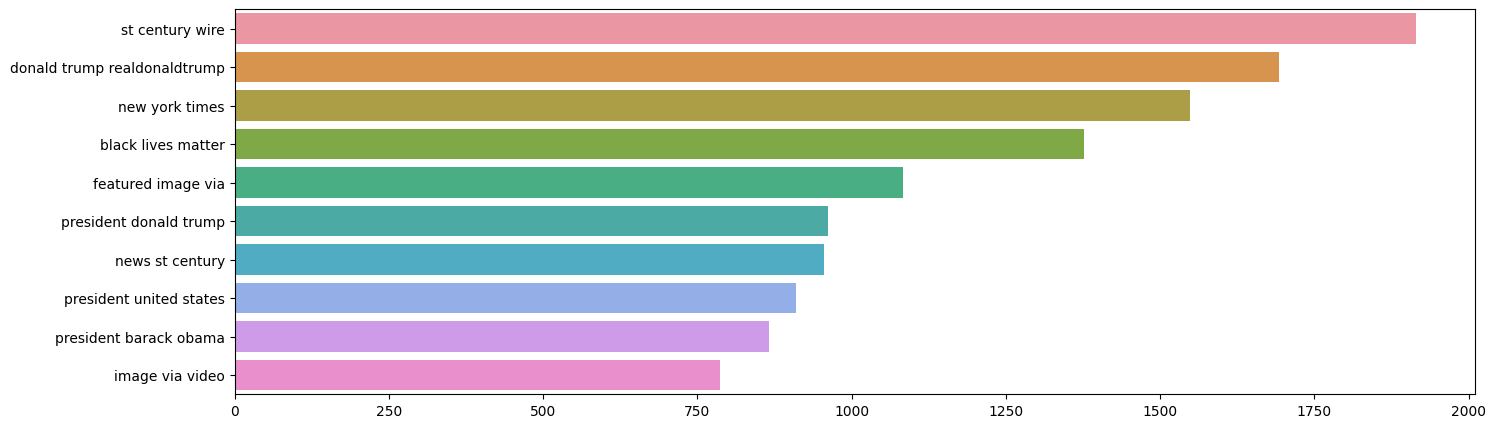

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize = (16,5))
most_common_tri = get_top_text_ngrams(fdf.combo,10,3)
most_common_tri = dict(most_common_tri)
sns.set_palette("husl")
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

Analysis 

{'image via video screen capture': 622, 'wire subscribe become member wiretv': 451, 'filessupport wire subscribe become member': 328, 'work subscribing becoming member wiretv': 274, 'via chip somodevilla getty images': 245, 'image via chip somodevilla getty': 244, 'featured image via video screen': 244, 'filessupport work subscribing becoming member': 234, 'alternate current radio network acr': 217, 'image via ale wong getty': 214}


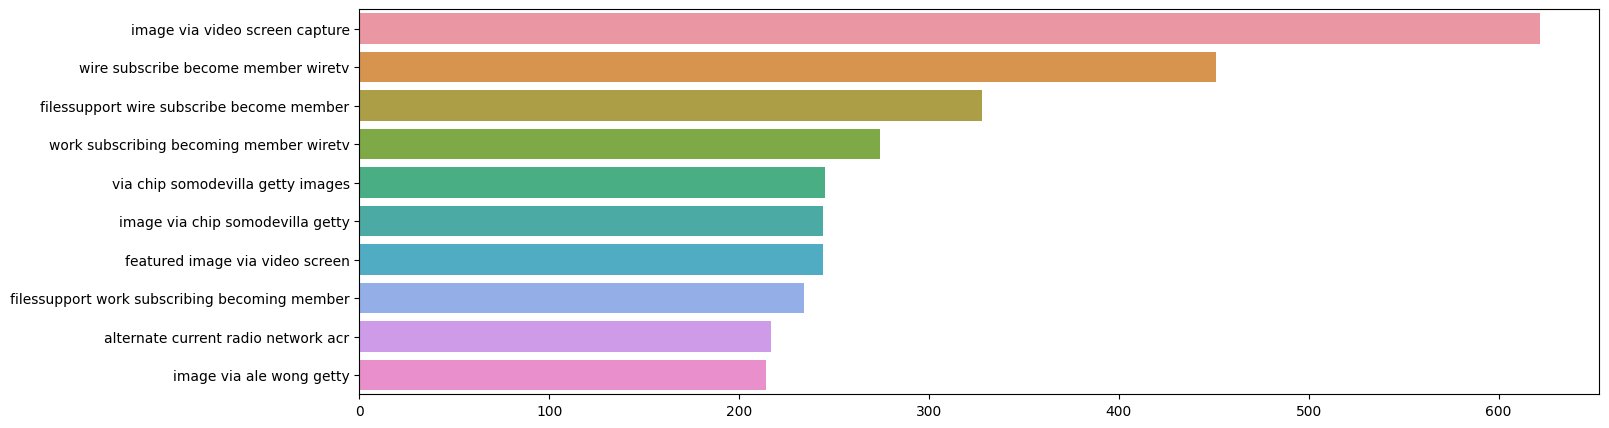

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize = (16,5))
most_common_five = get_top_text_ngrams(fdf.combo,10,5)
most_common_five = dict(most_common_five)
sns.set_palette("husl")
sns.barplot(x=list(most_common_five.values()),y=list(most_common_five.keys()))
print (most_common_five)

In [28]:
X_train , X_test, Y_train, Y_test = train_test_split(dataset['combo'], dataset['label'], random_state=42,test_size=0.1)
# print(type(X_train))

In [29]:
vector=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=STOPWORDS)
vector.fit(X_train)

TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents='ascii')

In [30]:
def evaluate(model_preds, ground_truth):
  precision, recall, fscore, train_support = score(ground_truth, model_preds, average='micro')
  print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
      round(precision, 3), round(recall, 3), round(fscore,3), round(acs(ground_truth,model_preds), 3)))

  # Making the Confusion Matrix
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(ground_truth, model_preds)
  class_label = [0,1]
  df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
  sns.heatmap(df_cm, annot=True, fmt='d')
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

In [31]:
CVcombo = CountVectorizer().fit(X_train)
TFcombo = TfidfVectorizer().fit(X_train)
# print(type(CVcombo))

In [32]:
CVProData, TFProData = CVcombo.transform(X_train), TFcombo.transform(X_train)

In [33]:
from sklearn.svm import SVC
CVSVM = SVC(C=1.0, kernel='linear', degree=4, gamma='auto')
CVSVM.fit(CVProData,Y_train)

SVC(degree=4, gamma='auto', kernel='linear')

Precision: 0.998 / Recall: 0.998 / F1-Score: 0.998 / Accuracy: 0.998


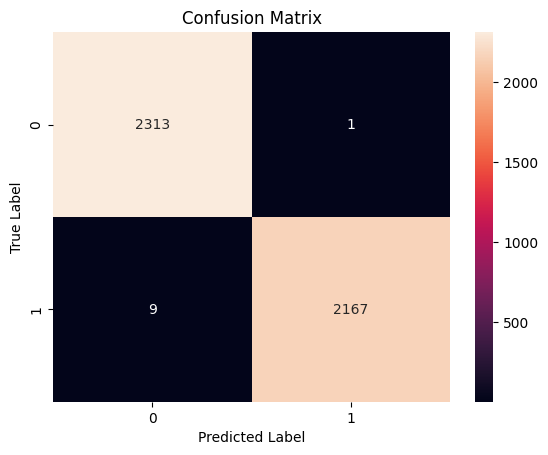

In [34]:
CVtestData = CVcombo.transform(X_test)
CSPred = CVSVM.predict(CVtestData)
evaluate(CSPred, Y_test)

In [35]:
TFSVM = SVC(C=1.0, kernel='linear', degree=4, gamma='auto')
TFSVM.fit(TFProData,Y_train)

SVC(degree=4, gamma='auto', kernel='linear')

In [ ]:
TFtestData = TFcombo.transform(X_test)
TSPred = TFSVM.predict(CVtestData)
evaluate(TSPred, Y_test)

Precision: 0.998 / Recall: 0.998 / F1-Score: 0.998 / Accuracy: 0.998


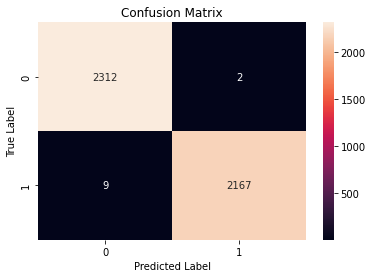

In [ ]:
from sklearn.linear_model import LogisticRegression
CVlr = LogisticRegression(random_state=0, max_iter = 500).fit(CVProData, Y_train)
CVlrPred = CVlr.predict(CVtestData)
evaluate(CVlrPred, Y_test)

Precision: 0.992 / Recall: 0.992 / F1-Score: 0.992 / Accuracy: 0.992


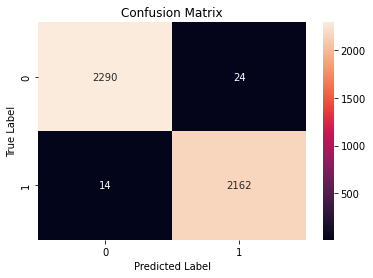

In [ ]:
TFlr = LogisticRegression(random_state=0, max_iter = 500).fit(TFProData, Y_train)
TFlrPred = TFlr.predict(TFtestData)
evaluate(TFlrPred, Y_test)

In [ ]:
CVrf = RandomForestClassifier(n_estimators=75, max_depth=None, n_jobs=-1)
CVrf.fit(CVProData, Y_train)

RandomForestClassifier(n_estimators=75, n_jobs=-1)

Precision: 0.998 / Recall: 0.998 / F1-Score: 0.998 / Accuracy: 0.998


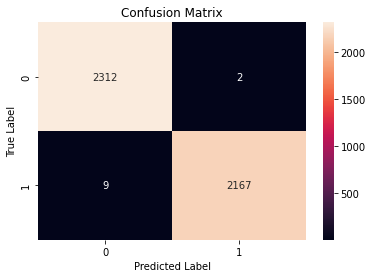

In [ ]:
CVrfPred = CVrf.predict(CVtestData)
evaluate(CVlrPred, Y_test)

In [ ]:
TFrf = RandomForestClassifier(n_estimators=75, max_depth=None, n_jobs=-1)
TFrf_model = TFrf.fit(TFProData, Y_train)

Precision: 0.994 / Recall: 0.994 / F1-Score: 0.994 / Accuracy: 0.994


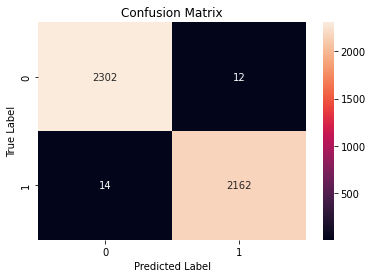

In [ ]:
TFrfPred = TFrf.predict(TFtestData)
evaluate(TFrfPred, Y_test)